The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y, last column).

# Start code: Loading the data and other imports



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('bank-additional-full.csv',sep=';')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
len(df)

41188

Checking for null values and first correlations in data frame

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
df['y'] =  df['y'].map( {'yes': 1 , 'no':0} )

In [5]:
df.corr()['y'].sort_values(ascending=False)

y                 1.000000
duration          0.405274
previous          0.230181
cons.conf.idx     0.054878
age               0.030399
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y, dtype: float64

In [6]:
df_names = pd.read_csv('names.csv', names=['id', 'name', 'description'])

In [7]:
df_names.head(4)

,id,name,description
0,1,age,- age (numeric)
1,2,job,"- job : type of job (categorical: ""admin."",""b..."
2,3,marital,"- marital : marital status (categorical: ""divo..."
3,4,education,"- education (categorical: ""basic.4y"",""basic.6y..."


In [8]:
def check_feat(name):
  i=0
  while (i < df_names.count()['name']):
    if df_names.loc[i]['name'] == name:
      print(df_names.loc[i]['description'])
    i=i+1

In [9]:
check_feat('duration')

- duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


In [10]:
check_feat('nr.employed')

- nr.employed: number of employees - quarterly indicator (numeric)


It seems that 'duration' - last contact duration and 'nr.employed' - number of employees are quite good correlated with y - chance that client will subscribe (yes/no) a term deposit.
So it's logical that longer conversation with client is a better chance to sell product. Also higher number of employees it's maybe a better situation for seller, tasks are distibuated to bigger team. 

# Exploratory Data Analysis

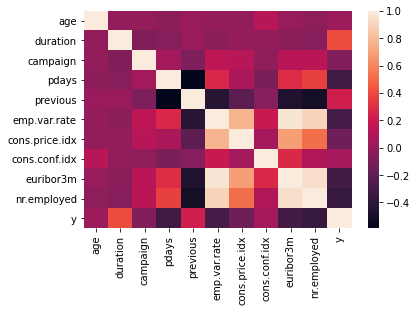

In [ ]:
sns.heatmap(df.select_dtypes(['int64','float64']).corr())

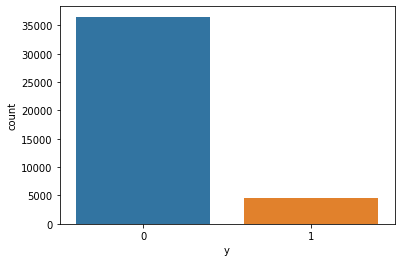

In [ ]:
sns.countplot(df['y'])

In [ ]:
df[df['y'] ==1]['y'].count() / df['y'].count()  * 100
# % of subscribed term deposits:

11.265417111780131

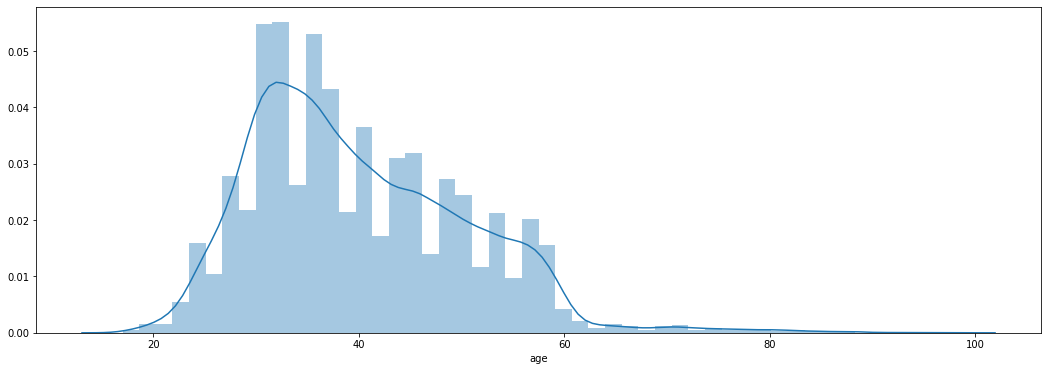

In [ ]:
plt.figure(figsize=(18,6))
sns.distplot(df['age'])

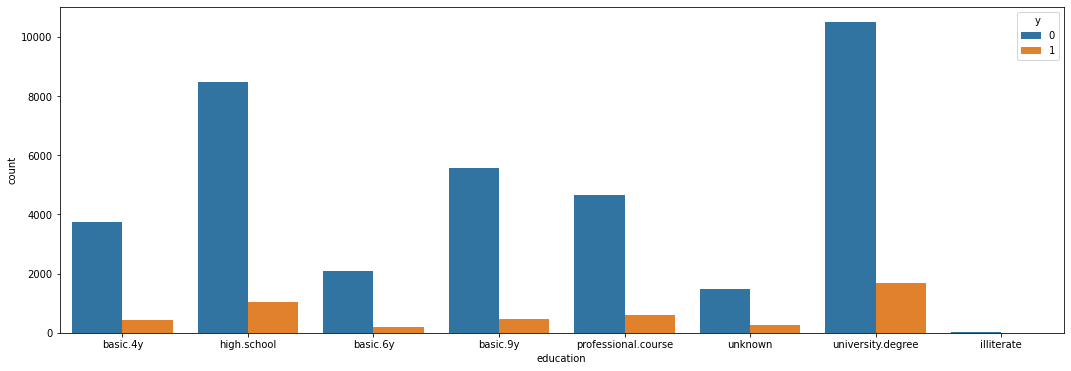

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x=df['education'],hue=df['y'],data=df)

In [ ]:
((df[ df['y'] ==1 ])['education'].value_counts()  /  df['education'].value_counts()  * 100).sort_values(ascending = False)

illiterate             22.222222
unknown                14.500289
university.degree      13.724523
professional.course    11.348465
high.school            10.835523
basic.4y               10.249042
basic.6y                8.202443
basic.9y                7.824648
Name: education, dtype: float64

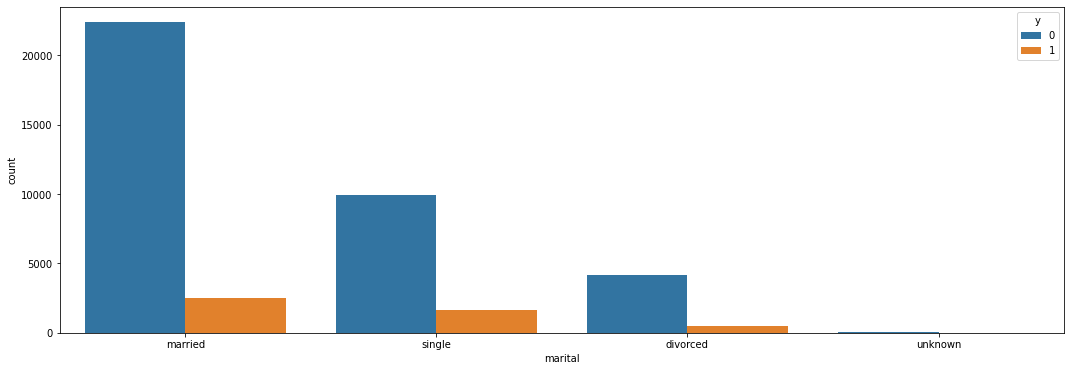

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x=df['marital'],hue=df['y'],data=df)

In [ ]:
((df[ df['y'] ==1 ])['marital'].value_counts()  /  df['marital'].value_counts()  * 100).sort_values(ascending = False)

unknown     15.000000
single      14.004149
divorced    10.320902
married     10.157253
Name: marital, dtype: float64

It seems that illiterate people most often subscribe for a term deposit.
 Nothing special for matrial group.

In [ ]:
(df[ df['y'] ==0 ])['education'].value_counts()

university.degree      10498
high.school             8484
basic.9y                5572
professional.course     4648
basic.4y                3748
basic.6y                2104
unknown                 1480
illiterate                14
Name: education, dtype: int64

# Data PreProcessing

In [ ]:
df.select_dtypes(['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [ ]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Because status 'unknown' is useless i will change it to unemployed

In [11]:
df['job']=df['job'].replace(['unknown'], 'unemployed')

In [12]:
dummies = pd.get_dummies(df['job'], drop_first=True)

In [13]:
df= pd.concat([ df.drop('job', axis=1), dummies] , axis=1)

In [14]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [16]:
df [df['marital'] == 'unknown' ]['marital'].count()  /  df['marital'].count()  *100

0.1942313295134505

Because column marital with unknown status is useless and it's only 0,2 % total base i will remove these rows - the unknown value is useless


In [17]:
df.drop ( index =  df [df['marital'] == 'unknown' ]['marital'].index, inplace=True   )

In [18]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

In [19]:
dummies = pd.get_dummies(df['marital'], drop_first=True)

In [20]:
df= pd.concat([ df.drop('marital', axis=1), dummies] , axis=1)

In [23]:
df['education'].value_counts()

university.degree      12137
high.school             9501
basic.9y                6037
professional.course     5237
basic.4y                4170
basic.6y                2286
unknown                 1722
illiterate                18
Name: education, dtype: int64

In [24]:
df['contact'].value_counts()

cellular     26091
telephone    15017
Name: contact, dtype: int64

In [25]:
df['poutcome'].value_counts()

nonexistent    35501
failure         4239
success         1368
Name: poutcome, dtype: int64

I will do dummies for education, contact and poutcome features

In [26]:
dummies = pd.get_dummies(df['education'], drop_first=True)

In [27]:
df= pd.concat([ df.drop('education', axis=1), dummies] , axis=1)

In [28]:
dummies = pd.get_dummies(df['contact'], drop_first=True)

In [29]:
df= pd.concat([ df.drop('contact', axis=1), dummies] , axis=1)

In [30]:
dummies = pd.get_dummies(df['poutcome'], drop_first=True)

In [31]:
df= pd.concat([ df.drop('poutcome', axis=1), dummies] , axis=1)

In [33]:
df['month'].value_counts()

may    13736
jul     7165
aug     6168
jun     5306
nov     4094
apr     2629
oct      715
sep      570
mar      543
dec      182
Name: month, dtype: int64

In [34]:
df['day_of_week'].value_counts()

thu    8599
mon    8495
wed    8120
tue    8079
fri    7815
Name: day_of_week, dtype: int64

I think that information about last contact with customer: month it's not enough to predict anything, we don't when the contact with customer was vs todays date (one year from now or more). I will remove this column.
I will leave day of the week, maybe we have specific days when customers are willing to subscribe a term deposit

In [37]:
df.drop(columns='month', inplace=True, axis=1)

In [40]:
df['day_of_week'] = df['day_of_week'].map( {'thu':4, 'mon':1, 'wed':3, 'tue':2, 'fri':5}  )

In [43]:
df['default'].value_counts()

no         32519
unknown     8586
yes            3
Name: default, dtype: int64

In [44]:
df['housing'].value_counts()

yes        21541
no         18578
unknown      989
Name: housing, dtype: int64

In [45]:
df['loan'].value_counts()

no         33883
yes         6236
unknown      989
Name: loan, dtype: int64

I will do dummies for default, housing and loan features

In [46]:
dummies = pd.get_dummies(df['default'], drop_first=True)

In [47]:
df= pd.concat([ df.drop('default', axis=1), dummies] , axis=1)

In [48]:
dummies = pd.get_dummies(df['housing'], drop_first=True)

In [49]:
df= pd.concat([ df.drop('housing', axis=1), dummies] , axis=1)

In [50]:
dummies = pd.get_dummies(df['loan'], drop_first=True)

In [51]:
df= pd.concat([ df.drop('loan', axis=1), dummies] , axis=1)

In [53]:
df.head(3)

,age,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown,telephone,nonexistent,success,unknown,yes,unknown,yes,unknown,yes
0,56,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,57,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0
2,37,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0


Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = df.drop(columns='y', axis=1).values
y = df['y'].values

In [60]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=102)

# Creating the Model

Normalizing the Data

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

In [64]:
X_train = scaler.fit_transform(X_train)

In [65]:
X_test = scaler.transform(X_test)

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [70]:
len(df.columns)

40

For classification problem i will use loss binary crossentropy and adam optimizer.

In [72]:
model = Sequential()

model.add( Dense(40, activation='relu'))

model.add( Dense(20, activation='relu'))

model.add( Dense(10, activation='relu'))

model.add( Dense(1,  activation='sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy')

In [73]:
model.fit(x=X_train, y=y_train, batch_size=256, validation_data=(X_test,y_test), epochs= 100)

Epoch 1/100
113/113 [==============================] - 0s 4ms/step - loss: 0.4031 - val_loss: 0.2985
Epoch 2/100
113/113 [==============================] - 0s 2ms/step - loss: 0.2833 - val_loss: 0.2792
Epoch 3/100
113/113 [==============================] - 0s 2ms/step - loss: 0.2662 - val_loss: 0.2616
Epoch 4/100
113/113 [==============================] - 0s 3ms/step - loss: 0.2425 - val_loss: 0.2330
Epoch 5/100
113/113 [==============================] - 0s 2ms/step - loss: 0.2157 - val_loss: 0.2184
Epoch 6/100
113/113 [==============================] - 0s 2ms/step - loss: 0.2050 - val_loss: 0.2120
Epoch 7/100
113/113 [==============================] - 0s 2ms/step - loss: 0.1999 - val_loss: 0.2089
Epoch 8/100
113/113 [==============================] - 0s 2ms/step - loss: 0.1975 - val_loss: 0.2075
Epoch 9/100
113/113 [==============================] - 0s 2ms/step - loss: 0.1946 - val_loss: 0.2055
Epoch 10/100
113/113 [==============================] - 0s 2ms/step - loss: 0.1922 - val_lo

Checking the results of the model fit

In [74]:
losses = pd.DataFrame(model.history.history)

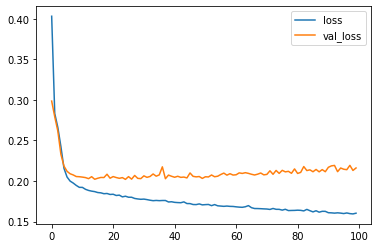

In [75]:
losses.plot()

In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Checking the results of predictions

In [78]:
print(confusion_matrix(y_test,predictions))
print( classification_report(y_test, predictions))

[[10378   567]
 [  648   740]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     10945
           1       0.57      0.53      0.55      1388

    accuracy                           0.90     12333
   macro avg       0.75      0.74      0.75     12333
weighted avg       0.90      0.90      0.90     12333



Poor results for group 1, I will use EarlyStopping to avoid deviation for the validation data, additionally i will use Dropout to prevent overfitting.

In [79]:
from tensorflow.keras.callbacks import EarlyStopping

In [81]:
early_stop=EarlyStopping(monitor='val_loss', mode='min', patience=20)

In [90]:
from tensorflow.keras.layers import Dense, Activation,Dropout

In [111]:
model = Sequential()

model.add( Dense(40, activation='relu'))
model.add(Dropout(0.2))

model.add( Dense(20, activation='relu'))
model.add(Dropout(0.2))

model.add( Dense(10, activation='relu'))
model.add(Dropout(0.2))

model.add( Dense(1,  activation='sigmoid'))
model.add(Dropout(0.2))

model.compile(optimizer='adam', loss = 'binary_crossentropy')

In [112]:
model.fit(x=X_train, y=y_train, batch_size=8, validation_data=(X_test,y_test), epochs= 100, callbacks=[early_stop])

Epoch 1/100
3597/3597 [==============================] - 6s 2ms/step - loss: 0.5964 - val_loss: 0.2406
Epoch 2/100
3597/3597 [==============================] - 6s 2ms/step - loss: 0.5348 - val_loss: 0.2294
Epoch 3/100
3597/3597 [==============================] - 6s 2ms/step - loss: 0.5259 - val_loss: 0.2172
Epoch 4/100
3597/3597 [==============================] - 6s 2ms/step - loss: 0.5220 - val_loss: 0.2088
Epoch 5/100
3597/3597 [==============================] - 6s 2ms/step - loss: 0.5022 - val_loss: 0.2139
Epoch 6/100
3597/3597 [==============================] - 6s 2ms/step - loss: 0.5007 - val_loss: 0.2073
Epoch 7/100
3597/3597 [==============================] - 6s 2ms/step - loss: 0.5166 - val_loss: 0.2056
Epoch 8/100
3597/3597 [==============================] - 6s 2ms/step - loss: 0.5093 - val_loss: 0.2034
Epoch 9/100
3597/3597 [==============================] - 6s 2ms/step - loss: 0.5008 - val_loss: 0.2032
Epoch 10/100
3597/3597 [==============================] - 6s 2ms/step - l

In [113]:
predictions = model.predict_classes(X_test)

Checking the results of predictions

In [116]:
print(confusion_matrix(y_test,predictions))
print( classification_report(y_test, predictions))

[[10904    41]
 [ 1217   171]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     10945
           1       0.81      0.12      0.21      1388

    accuracy                           0.90     12333
   macro avg       0.85      0.56      0.58     12333
weighted avg       0.89      0.90      0.86     12333



Now the results are much better especially for values 1 

Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')  